<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/15_svm/svm_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

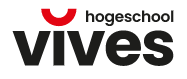<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# **SUPPORT VECTOR MACHINES: VOORBEELDEN**

Deze notebook bevat enkele voorbeelden die de presentatie met theorie over support vector machines (SVMs) verduidelijken.

## `LinearSVC`

In dit voorbeeldje wordt een lineair scheidbare dataset gegenereerd adhv `make_blobs`.

Daarna wordt `LinearSVC` toegepast met verschillende waarden voor hyperparameter C:
- C = 1;
- C = 100.

In [20]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

In [ ]:
# Create a synthetic dataset
X, y = make_blobs(n_samples=40, centers=2, random_state=0)

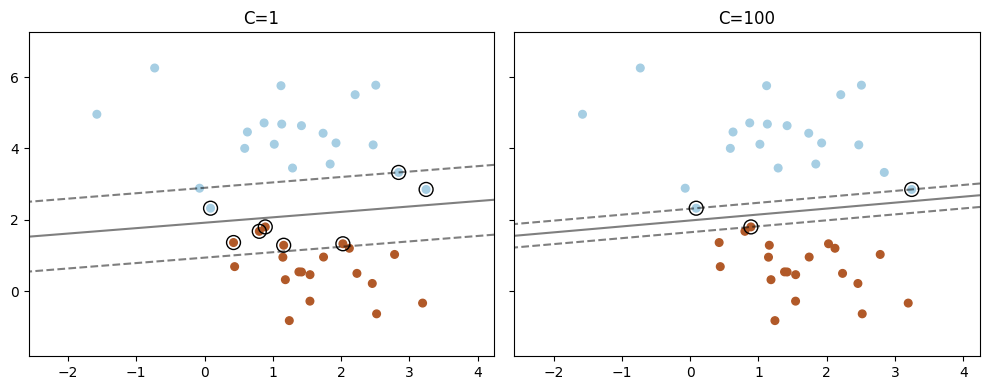

In [19]:
# Create two subplots
_, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Train two models using C = 1 and C = 100, respectively
for C, ax in zip([1, 100], axes):

    # Train the LinearSVC model
    clf = LinearSVC(C=C, loss="hinge", random_state=42, dual=True).fit(X, y)

    # Get the support vectors
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
    support_vectors = X[support_vector_indices]

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Plot the decision boundary and the street
    DecisionBoundaryDisplay.from_estimator(
        clf, X,
        levels=[-1, 0, 1], linestyles=["--", "-", "--"],  # [margin, separating line, maring]
        ax=ax, grid_resolution=50, plot_method="contour", colors="k", alpha=0.5,
    )

    # Plot the support vectors
    ax.scatter(
        support_vectors[:, 0], support_vectors[:, 1],
        s=100, linewidth=1, facecolors="none", edgecolors="k",
    )

    ax.set_title(f"C={C}")

plt.tight_layout()

## `SVC` en `SGDClassifier`

Dit is het voorbeeldje van de Iris dataset uit het boek waarin de alternatieven voor `LinearSVC` worden uitgelegd:

- `SVC` with linear kernel
- `SGDClassifier` with hinge loss

We passen hier ook de `StandardScaler` toe waarbij we gebruik maken van een `Pipeline`.

In [21]:
# Import statements
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [25]:
# Get subset of Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [26]:
# New data point
Xnew = [[5.5, 1.7]]

In [27]:
# Apply LinearSVC

C = 1  # hyperparameter C
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=C, loss="hinge")),
])
svm_clf.fit(X, y)
svm_clf.predict(Xnew).item()

1.0

In [28]:
# Apply SVC with linear kernel

svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(C=C, kernel="linear")),
])
svc_clf.fit(X, y)
svc_clf.predict(Xnew).item()

1.0

In [29]:
# Apply SGDClassifier with hinge loss

m = len(y)  # number of samples
sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SGDClassifier(alpha=1/(m*C), loss="hinge")),
])
svc_clf.fit(X, y)
svc_clf.predict(Xnew).item()

1.0

## `PolynomialFeatures`

Eenvoudig voorbeeldje uit het boek dat het idee achter het toevoegen van polynomial features illustreert.

In [97]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC, SVC

In [98]:
# Create dataset
X = np.arange(-4, 5)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

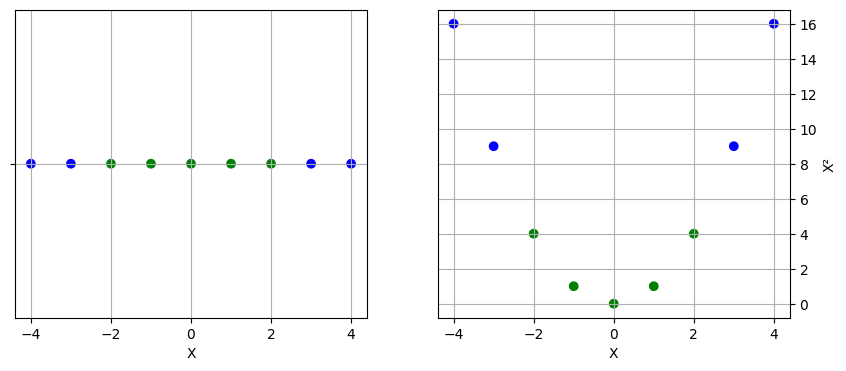

In [99]:
# Plot dataset without and with X² feature
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(X, np.zeros(len(y)), color=np.where(y==0, 'b', 'g'));
ax1.set_xlabel('X');
ax1.set_yticks([0]);
ax1.set_yticklabels([])
ax1.grid();

ax2.scatter(X, X**2, color=np.where(y==0, 'b', 'g'));
ax2.yaxis.set_ticks_position('right');
ax2.yaxis.set_label_position('right');
ax2.set_xlabel('X');
ax2.set_ylabel('X²');
ax2.grid();

In [106]:
# Train polynomial SVM of degree 2 using polynomial feature preprocessing
poly = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("linear_svc", LinearSVC(C=1E10, loss="hinge")),  # large C to get very small street
])
poly.fit(X[:, np.newaxis], y)
poly.score(X[:, np.newaxis], y)  # accuracy

1.0

In [107]:
# Train SVM using polynomial kernel of degree 2
svc = SVC(C=1E10, kernel="poly", degree=2)
svc.fit(X[:, np.newaxis], y)
svc.score(X[:, np.newaxis], y)  # accuracy

1.0

## Polynomial kernel

Voorbeeld uit het boek dat de moons dataset fit met een SVM waarbij in het eerste geval polynomial features worden toegevoegd en in het tweede geval een polynomial kernel wordt gebruikt.

In [127]:
# Import statements
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC, SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [158]:
# Generate moons dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

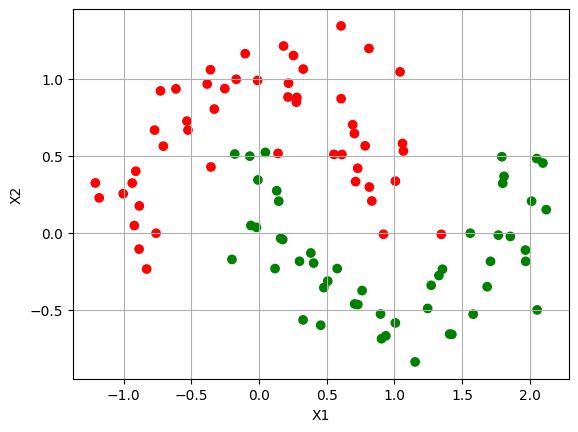

In [159]:
# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=np.where(y==0, 'r', 'g'));
plt.xlabel('X1');
plt.ylabel('X2');
plt.grid();

In [160]:
# Train linear SVM using polynomial feature preprocessing
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)
polynomial_svm_clf.score(X, y)

0.98

In [161]:
# Train SVM with polynomial kernel
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1.0, C=10))
])
poly_kernel_svm_clf.fit(X, y)
poly_kernel_svm_clf.score(X, y)

0.98

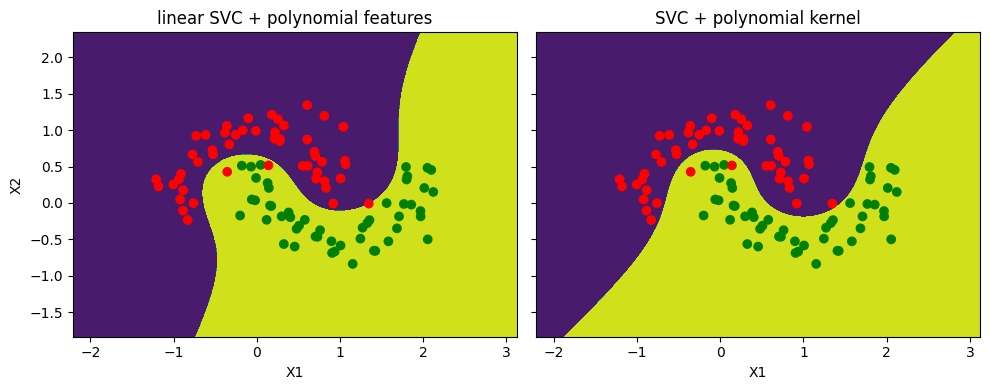

In [162]:
# Decision Boundary plots

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

DecisionBoundaryDisplay.from_estimator(polynomial_svm_clf, X,
                                       response_method="predict", grid_resolution=1000, ax=ax1);
ax1.scatter(X[:, 0], X[:, 1], c=np.where(y==0, 'r', 'g'));
ax1.set_xlabel('X1');
ax1.set_ylabel('X2');
ax1.set_title('linear SVC + polynomial features');

DecisionBoundaryDisplay.from_estimator(poly_kernel_svm_clf, X,
                                       response_method="predict", grid_resolution=1000, ax=ax2);

ax2.scatter(X[:, 0], X[:, 1], c=np.where(y==0, 'r', 'g'));
ax2.set_xlabel('X1');
ax2.set_title('SVC + polynomial kernel');

plt.tight_layout();

## Overfitting

Zelfde voorbeeld als daarnet maar nu wordt een SVM met polynomial kernel toegepast die gedefineerd wordt adhv verschillende hyperparameters `degree` (of d) en `coef0` (of r).

acc for degree = 3 and r = 1 : 0.98
acc for degree = 10 and r = 100 : 1.0


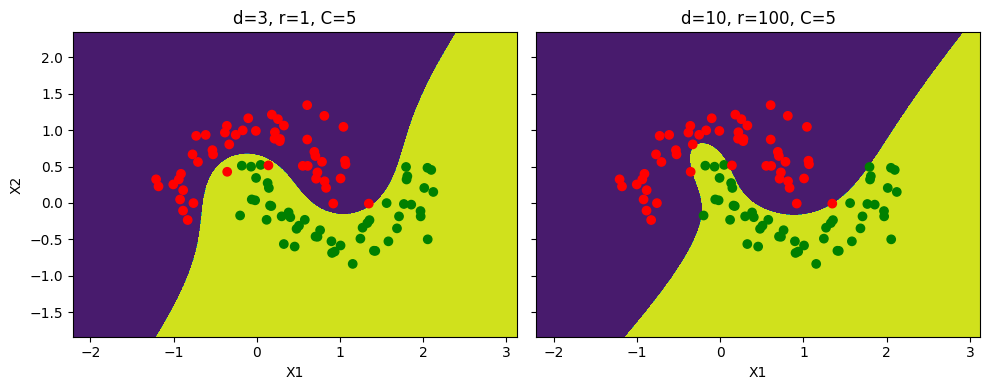

In [164]:
degrees = [3, 10]
coef0s = [1, 100]
_, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for degree, coef0, ax in zip(degrees, coef0s, axes):

    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=degree, coef0=coef0, C=5))
    ])
    poly_kernel_svm_clf.fit(X, y)
    print('acc for degree =', degree, 'and r =', coef0, ':', poly_kernel_svm_clf.score(X, y))

    DecisionBoundaryDisplay.from_estimator(poly_kernel_svm_clf, X,
                                           response_method="predict", grid_resolution=1000, ax=ax);
    ax.scatter(X[:, 0], X[:, 1], c=np.where(y==0, 'r', 'g'));
    ax.set_xlabel('X1');
    ax.set_title(f'd={degree}, r={coef0}, C=5');

axes[0].set_ylabel('X2');
plt.tight_layout();

Bij hogere degree d en hogere r is de kans op overfitting groter!

## Gaussian RBF kernel

Zelfde voorbeeld als daarnet maar nu wordt een SVM met Gaussian RBF kernel toegepast die gedefineerd wordt adhv verschillende hyperparameters `gamma` en `C`.

acc for gamma = 0.1 and C = 0.001 : 0.87
acc for gamma = 0.1 and C = 1000.0 : 0.98
acc for gamma = 5 and C = 0.001 : 0.98
acc for gamma = 5 and C = 1000.0 : 1.0


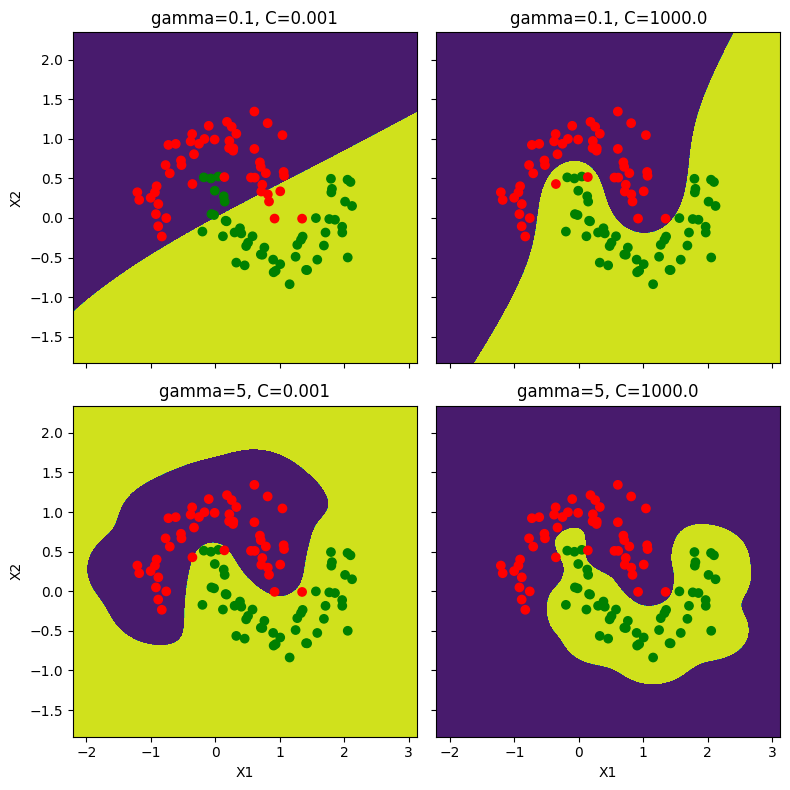

In [166]:
gammas = [0.1, 0.1, 5, 5]
Cs = [1e-3, 1e3, 1e-3, 1e3]
_, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

for gamma, C, ax in zip(gammas, Cs, axes.flatten()):

    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    print('acc for gamma =', gamma, 'and C =', C, ':', rbf_kernel_svm_clf.score(X, y))

    DecisionBoundaryDisplay.from_estimator(rbf_kernel_svm_clf, X,
                                           response_method="predict", grid_resolution=1000, ax=ax);
    ax.scatter(X[:, 0], X[:, 1], c=np.where(y==0, 'r', 'g'));
    ax.set_title(f'gamma={gamma}, C={C}');

axes[1][0].set_xlabel('X1');
axes[1][1].set_xlabel('X1');
axes[0][0].set_ylabel('X2');
axes[1][0].set_ylabel('X2');
plt.tight_layout();

Hoe groter `gamma`, hoe groter de kans op overfitting. Idem voor `C`. In dit voorbeeld geeft het model met kleine `gamma` en grote `C` een robuuste fit. Het model met beide hyperparameters gelijk aan een kleine waarde lijdt duidelijk aan underfitting, terwijl de modellen met grote `gamma` overfitting laten zien.

## Regressie

Tot slot geven we ook nog een voorbeeldje van een regressieprobleem dat met klasse `SVR` wordt opgelost. Net zoals in het boek gaat het ook om datapunten die gegenereerd zijn adhv een tweedegraadsveeltermfunctie. Er worden verschillende waarden voor hyperparameter `C` gedefineerd:
- `C = 100`;
- `C = 0.01`.

In [191]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [202]:
# Generate a dataset using a parabola with noise
np.random.seed(0)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = 0.5 * X.flatten()**2 + np.random.normal(scale=0.1, size=(100,))

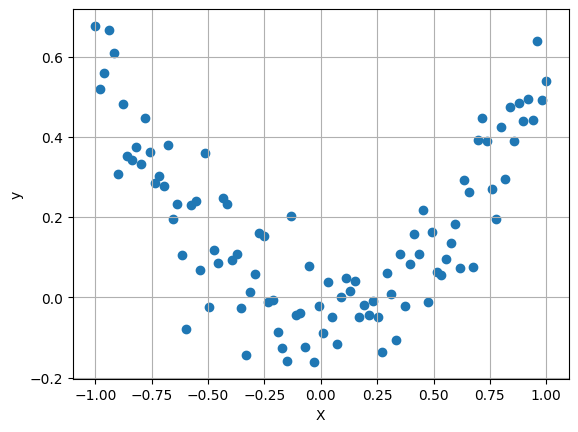

In [204]:
# Scatterplot
plt.scatter(X.flatten(), y);
plt.grid();
plt.xlabel('X');
plt.ylabel('y');

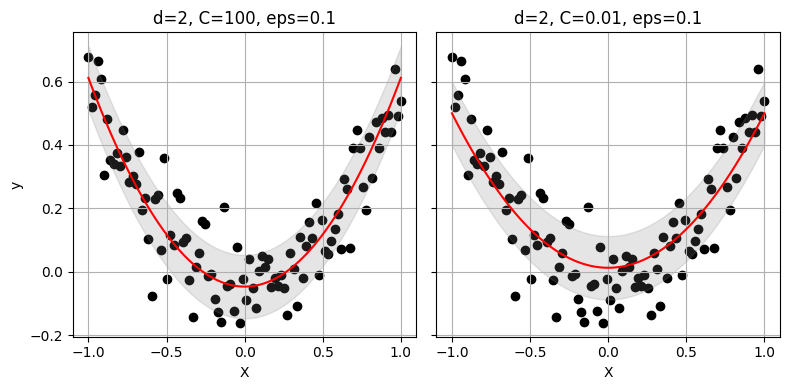

In [210]:
# Fit the data using different values for C and plot the result

Cs = [100, 0.01]
_, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))

for C, ax in zip(Cs, axes):

    # Fit the dataset using SVR
    svm_poly_reg = SVR(kernel="poly", degree=2, C=C, epsilon=0.1)
    svm_poly_reg.fit(X, y)

    # Plot the fitting curve
    ax.scatter(X, y, color='black', label='Data')
    ax.plot(X, svm_poly_reg.predict(X), color='red')

    # Plot the margin
    svr_lower = svm_poly_reg.predict(X) - svm_poly_reg.epsilon
    svr_upper = svm_poly_reg.predict(X) + svm_poly_reg.epsilon
    ax.fill_between(X.flatten(), svr_lower.flatten(), svr_upper.flatten(), color='gray', alpha=0.2)

    ax.set_title(f'd={svm_poly_reg.degree}, C={C}, eps={svm_poly_reg.epsilon}')
    ax.set_xlabel("X")
    ax.grid()

axes[0].set_ylabel("y")
plt.tight_layout()

---